# Se analiza un archivo con características de marcas de autos para predecir precios usando un modelo de regresión lineal múltiple de la biblioteca Scikit Learn de Python. Esta es una primera version.

## abrir archivo

In [691]:
import pandas as pd



In [692]:
df=pd.read_csv('AUTOS.csv')

## Análisis exploratorio

In [693]:
df.shape


(201, 32)

El archivo posee 201 filas (autos) y 32 columnas(características)

In [694]:
df.head()

,Unnamed: 0,simbolo,peso normalizado,marca,puertas,estilo,drive-wheels,loc_motor,wheel-base,largo,...,city-mpg,highway-mpg,precio,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [695]:
df.dtypes

Unnamed: 0             int64
simbolo                int64
peso normalizado       int64
marca                 object
puertas               object
estilo                object
drive-wheels          object
loc_motor             object
wheel-base           float64
largo                float64
ancho                float64
alto                 float64
peso                   int64
tipo_motor            object
cilindros             object
tam_motor              int64
sist_combustible      object
diam_cil             float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
precio               float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
diesel                 int64
gas                    int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object

Veamos si hay columnas con valores nulos:

In [696]:
df.isnull().sum()


Unnamed: 0           0
simbolo              0
peso normalizado     0
marca                0
puertas              0
estilo               0
drive-wheels         0
loc_motor            0
wheel-base           0
largo                0
ancho                0
alto                 0
peso                 0
tipo_motor           0
cilindros            0
tam_motor            0
sist_combustible     0
diam_cil             0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
precio               0
city-L/100km         0
highway-L/100km      0
horsepower-binned    0
diesel               0
gas                  0
aspiration-std       0
aspiration-turbo     0
dtype: int64

vemos que no hay valores nulos en ninguna columna.


Eliminaremos la columna inútil Unnamed:0

In [697]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

Veamos cuántos alfaromero hay:

In [698]:
print('hay',(df.marca=='alfa-romero').sum(),'alfa romero')

hay 3 alfa romero


Veamos todas las marcas:

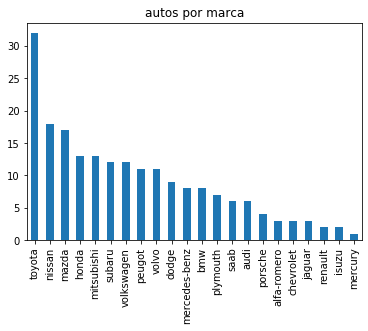

In [699]:
df['marca'].value_counts().plot(kind='bar',title='autos por marca')

Notamos en el archivo que sólo hay autos a gas o diesel. Veamos cuántos son de cada uno.

In [700]:
print('hay',(df.gas==1).sum(),'autos a gas y',(df.gas==0).sum(),'a diesel')

hay 181 autos a gas y 20 a diesel


Pasemos la columna precio al primer lugar del dataframe para mayor comodidad:

In [701]:
y=df['precio']
del df['precio']
df=pd.concat([y,df],axis=1)
df.head()

,precio,simbolo,peso normalizado,marca,puertas,estilo,drive-wheels,loc_motor,wheel-base,largo,...,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,13495.0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,11.190476,8.703704,Low,0,1,1,0
1,16500.0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,11.190476,8.703704,Low,0,1,1,0
2,16500.0,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,26,12.368421,9.038462,Medium,0,1,1,0
3,13950.0,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,30,9.791667,7.833333,Low,0,1,1,0
4,17450.0,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,22,13.055556,10.681818,Low,0,1,1,0


**Veamos algunas correlaciones:**

In [702]:
import seaborn as sns

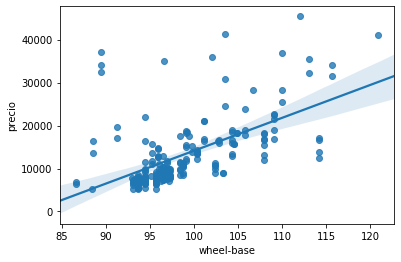

In [703]:
sns.regplot('wheel-base','precio',data=df)

In [704]:
df[['wheel-base','precio']].corr()

,wheel-base,precio
wheel-base,1.000000,0.584642
precio,0.584642,1.000000


La correlación entre wheel-base y precio es positiva y moderada (<0.6).

Veamos correlación entre todas las variables numéricas:

In [705]:
df1=df.corr()
df1

,precio,simbolo,peso normalizado,wheel-base,largo,ancho,alto,peso,tam_motor,diam_cil,...,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
precio,1.000000,-0.082391,0.133999,0.584642,0.690628,0.751265,0.135486,0.834415,0.872335,0.543155,...,0.809607,-0.101616,-0.686571,-0.704692,0.789898,0.801118,0.110326,-0.110326,-0.179578,0.179578
simbolo,-0.082391,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,...,0.075810,0.279740,-0.035527,0.036233,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
peso normalizado,0.133999,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,...,0.217300,0.239543,-0.225016,-0.181877,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,0.584642,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,...,0.371178,-0.360305,-0.470606,-0.543304,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
largo,0.690628,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,...,0.579795,-0.285970,-0.665192,-0.698142,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
ancho,0.751265,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,...,0.615056,-0.245800,-0.633531,-0.680635,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
alto,0.135486,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,...,-0.087001,-0.309974,-0.049800,-0.104812,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
peso,0.834415,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,...,0.757981,-0.279361,-0.749543,-0.794889,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
tam_motor,0.872335,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,...,0.822668,-0.256733,-0.650546,-0.679571,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
diam_cil,0.543155,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,...,0.566903,-0.267392,-0.582027,-0.591309,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816


Busquemos las variables con mayor correlación con la variable precio(valor absoluto>0.8):

In [706]:
df1[abs(df1['precio'])>0.8]

,precio,simbolo,peso normalizado,wheel-base,largo,ancho,alto,peso,tam_motor,diam_cil,...,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
precio,1.000000,-0.082391,0.133999,0.584642,0.690628,0.751265,0.135486,0.834415,0.872335,0.543155,...,0.809607,-0.101616,-0.686571,-0.704692,0.789898,0.801118,0.110326,-0.110326,-0.179578,0.179578
peso,0.834415,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,...,0.757981,-0.279361,-0.749543,-0.794889,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
tam_motor,0.872335,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,...,0.822668,-0.256733,-0.650546,-0.679571,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
horsepower,0.809607,0.075810,0.217300,0.371178,0.579795,0.615056,-0.087001,0.757981,0.822668,0.566903,...,1.000000,0.107884,-0.822192,-0.804579,0.889482,0.840627,-0.169030,0.169030,-0.251159,0.251159
highway-L/100km,0.801118,-0.029807,0.181189,0.577576,0.707108,0.736728,0.084301,0.836921,0.783465,0.559112,...,0.840627,0.017694,-0.909024,-0.951100,0.958306,1.000000,-0.158091,0.158091,-0.210720,0.210720


Vemos que las variables con mayor correlación con el precio son: peso,tam_motor,caballos de fuerza y consumo en carretera. Utilizaremos estas como variables predictivas del precio.

## Preprocesamiento

### Normalización:

Notemos que los datos ya están normalizados y que no hay valores nulos.

### División datos en training/test:

In [707]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.20,random_state=18)

In [708]:
train.shape, test.shape

((166, 31), (35, 31))

### Construccion modelo

In [709]:
from sklearn.linear_model import LinearRegression as LR
lm=LR()
X=df_train[['peso','tam_motor','horsepower','highway-L/100km']]
Y=df_train[['precio']]
lm.fit(X,Y)
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Obtencion predicciones usando los datos test:

In [710]:
Xtest=df_test[['peso','tam_motor','horsepower','highway-L/100km']]
Yhat=lm.predict(Xtest)


### Evaluación del modelo:

In [712]:
from sklearn.metrics import r2_score
e=r2_score(df_test[['precio']],Yhat)
print('Error r2=',e)

Error r2= 0.8706432861548565
